In [1]:
import numpy as np
import pyCalc as p
import random
l0 = p.var("function")
l1 = p.var("function")
l1_error = p.var("function")
sig = p.var("function")
l1_delta = p.var("function")
hlp = p.var("function")
tmp = p.var("function")
xs = p.var("constant",np.array([[1,1,1,1],
                               [0,1,0,1],
                               [0,0,1,1]]                           
                               , dtype= float))
ys = p.var("constant", np.array([0,0,1,1], dtype=float))
np.random.seed(1)
weights =2*np.random.random((3,1)) - 1
ws = p.var("independent", np.array([4,4]))
l0.f(ws, xs, "*")
l1.sf(l0, "sigmoid")
l1_error.f(ys, l1, "-")
sig.sf(l1, "sigmoid_r")
l1_delta.f(sig, l1_error, "rowwise")
hlp.f(xs,l1_delta, "rowwise")
tmp.sf(hlp, "rowsum")

In [2]:
g= []
for i in range(1000):
    weights = weights + tmp.value(dict([(ws,weights)]))
    g.append(np.sum(l1_error.value(dict([(ws,weights)]))))
print(weights)

[[-3.41226491]
 [-0.21941767]
 [ 7.25722855]]


In [3]:
print(l1.value(dict([(ws,weights)])))
print(np.sum(l1_error.value(dict([(ws,weights)]))))

[[ 0.03191435  0.02578893  0.97906059  0.97405642]]
-0.010820293799


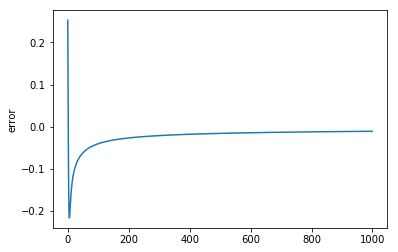

In [4]:
import matplotlib.pyplot as plt
plt.plot(g)
plt.ylabel('error')
plt.show()